In [84]:
import numpy as np
import pandas as pd

import joblib
import os

from datetime  import datetime

In [85]:
result_path=r'D:\JupyterCode\MyDev\AlgoTradingProject\ML-S50F\Lab-S50F_XGBoost\S50F-XGB_Model\result-data'
result_file='xgb_short_full.csv'

path_file=f'{result_path}\\{result_file}'
#print(os.path.exists(path_file))

In [86]:
df=pd.read_csv(path_file,index_col='datetime', parse_dates=['datetime'],dayfirst=True)
df['Signal'].value_counts()

1    2548
0    1887
Name: Signal, dtype: int64

In [87]:
signal1_df=df.query('Signal==1')
print(signal1_df.info())
signal1_df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2020-07-01 09:45:00 to 2021-05-06 12:15:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          2548 non-null   float64
 1   high          2548 non-null   float64
 2   low           2548 non-null   float64
 3   close         2548 non-null   float64
 4   Signal        2548 non-null   int64  
 5   Prob_Trend_1  2548 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 139.3 KB
None


,open,high,low,close,Signal,Prob_Trend_1
datetime,,,,,,
2021-05-06 11:15:00,934.5,936.8,934.2,936.6,1,66.883540
2021-05-06 11:30:00,936.7,938.0,935.3,936.5,1,66.883540
2021-05-06 11:45:00,936.6,937.5,935.5,935.6,1,63.580917
2021-05-06 12:00:00,935.7,936.9,935.5,936.0,1,62.177322
2021-05-06 12:15:00,935.9,936.5,934.4,936.4,1,60.177757


In [88]:
signal1_df['Prob_Trend_1'].describe()

count    2548.000000
mean       89.819051
std        13.350001
min        50.060127
25%        85.076620
50%        96.188763
75%        99.500500
max        99.932840
Name: Prob_Trend_1, dtype: float64

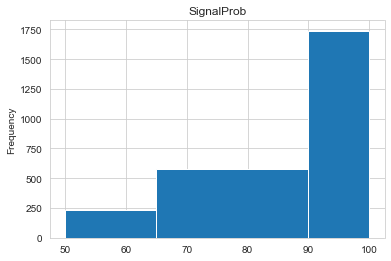

In [89]:
import seaborn as sns

sns.set_style('whitegrid')

signal1_df['Prob_Trend_1'].plot.hist(title='SignalProb', bins=[50,65,90,100])
#signal1_df['Prob_Trend_1'].plot.hist(title='SignalProb', bins=5)

In [73]:
pd.cut(signal1_df['Prob_Trend_1'], bins=10)

datetime
2020-11-05 15:45:00    (65.045, 70.032]
2020-11-05 16:15:00    (65.045, 70.032]
2020-11-05 16:30:00    (65.045, 70.032]
2020-11-05 16:45:00    (80.005, 84.992]
2020-11-06 10:00:00    (65.045, 70.032]
                             ...       
2021-04-05 15:30:00    (89.979, 94.965]
2021-04-05 15:45:00    (80.005, 84.992]
2021-04-05 16:00:00    (80.005, 84.992]
2021-04-05 16:30:00    (89.979, 94.965]
2021-04-05 16:45:00    (89.979, 94.965]
Name: Prob_Trend_1, Length: 1315, dtype: category
Categories (10, interval[float64]): [(50.036, 55.072] < (55.072, 60.059] < (60.059, 65.045] < (65.045, 70.032] ... (80.005, 84.992] < (84.992, 89.979] < (89.979, 94.965] < (94.965, 99.952]]